Ianaro Martina

Perozzi Davide

Vincenzi Fabian

In [1]:
# system packages
import os
#import shutil
import sys

# data and numerical management packages
import pandas as pd
import numpy as np

# typing
from typing import List, Callable, Dict

## Part 1

Download the corpora and extract it, structuring a dataframe.

In [2]:
from urllib import request
import zipfile

print(f"Current work directory: {os.getcwd()}")
dataset_folder = os.path.join(os.getcwd(), "Datasets")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"
dataset_path = os.path.join(dataset_folder, "Corpora.zip")
print(dataset_path)

def download_dataset(download_path: str, url: str):
    if not os.path.exists(download_path):
        print("Downloading dataset...")
        request.urlretrieve(url, download_path)
        print("Download complete!")

def extract_dataset(download_path: str, extract_path: str):
    print("Extracting dataset... (it may take a while...)")
    with zipfile.ZipFile(download_path) as loaded_zip:
        loaded_zip.extractall(extract_path)
    print("Extraction completed!")


download_dataset(dataset_path, url)
extract_dataset(dataset_path, dataset_folder)

Current work directory: C:\Users\fabian\Desktop\lab\homework1
C:\Users\fabian\Desktop\lab\homework1\Datasets\Corpora.zip
Extracting dataset... (it may take a while...)
Extraction completed!


In [3]:
def encode_dataset(dataset_name:str) -> pd.DataFrame:
    dataframe_rows = []
    folder = os.path.join(os.getcwd(), "Datasets", dataset_name)

    for filename in os.listdir(folder):   
        
        #doc = filename.split("_")[1].split(".")[0]
        #num = int(doc)
        
        # prepare the variable with the sentences of the document 
        sentences = ""
        labels = ""
        
        file_path = os.path.join(folder, filename)
        try:
            if os.path.isfile(file_path):
                with open(file_path, mode='r', encoding='utf-8') as text_file:
                    
                    
                    # read every line, add the word and the corresponding label
                    lines = text_file.readlines()  
                    for line in lines:
                        if not line.isspace():                     
                            text = line.strip()
                            sentences = sentences + text.split('\t')[0] + " "
                            labels = labels + text.split('\t')[1] + " "
                            
                        
                        
       
                    
        except Exception as e:
            print('Failed to process %s. Reason: %s' % (file_path, e))
            sys.exit(0)
            
        # create single dataframe row and add it 
        dataframe_row = {
            "sentence": sentences,
            "label": labels
        }
        dataframe_rows.append(dataframe_row)

        
    folder = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name)
    if not os.path.exists(folder):
        os.makedirs(folder)
        
        
    # transform the list of rows in a proper dataframe
    df = pd.DataFrame(dataframe_rows)
    df = df[["sentence", "label"]]
    dataframe_path = os.path.join(folder, dataset_name + ".pkl")
    df.to_pickle(dataframe_path)
    
    return df                
    

In [4]:
print("Encoding dataset...")
df = encode_dataset(dataset_name='dependency_treebank')
print("Encoding completed!")

Encoding dataset...
Encoding completed!


In [5]:
# print example of first document

print(df.sentence[0])
print(df.label[0])

Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 . Mr. Vinken is chairman of Elsevier N.V. , the Dutch publishing group . 
NNP NNP , CD NNS JJ , MD VB DT NN IN DT JJ NN NNP CD . NNP NNP VBZ NN IN NNP NNP , DT NNP VBG NN . 


### Pre Processing data

In [6]:
from functools import reduce

In [7]:
# define function that lower case the text

def lower(text: str) -> str:
    """
    Transforms given text to lower case.
    """
    return text.lower()

In [8]:
# define the preprocessing operation that we have to do 
PREPROCESSING_PIPELINE = [lower]

# define function that execute all the operation in preprocessing_pipeline
def text_prepare(text: str,
                 filter_methods: List[Callable[[str], str]] = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)

In [9]:
# apply the preprocess 
df.sentence = df.sentence.apply(lambda txt: text_prepare(txt))
df.label = df.label.apply(lambda txt: text_prepare(txt))

In [10]:
# print the same example after the preprocessing
print(df.sentence[0])
print(df.label[0])

pierre vinken , 61 years old , will join the board as a nonexecutive director nov. 29 . mr. vinken is chairman of elsevier n.v. , the dutch publishing group . 
nnp nnp , cd nns jj , md vb dt nn in dt jj nn nnp cd . nnp nnp vbz nn in nnp nnp , dt nnp vbg nn . 


In [11]:
# compute the total number of words and tag label

num_words = len(set([word for i in range(df.shape[0]) for word in df.sentence[i].split() ]))
num_tags   = len(set([word for i in range(df.shape[0]) for word in df.label[i].split()]))

In [12]:
print("Total number of tagged sentences: {}".format(len(df.sentence)))
print("Vocabulary size: {}".format(num_words))
print("Total number of tags: {}".format(num_tags))

Total number of tagged sentences: 199
Vocabulary size: 10947
Total number of tags: 45


In [13]:
# In this many-to-many problem, the length of each input and output sequence must be the same.
# Since each word is tagged, it's important to make sure that the length of input sequence equals the output sequence
print("Length of first input sequence  : {}".format(len(df.sentence[0].split())))
print("Length of first output sequence : {}".format(len(df.label[0].split())))

Length of first input sequence  : 31
Length of first output sequence : 31


In [14]:
import matplotlib.pyplot as plt

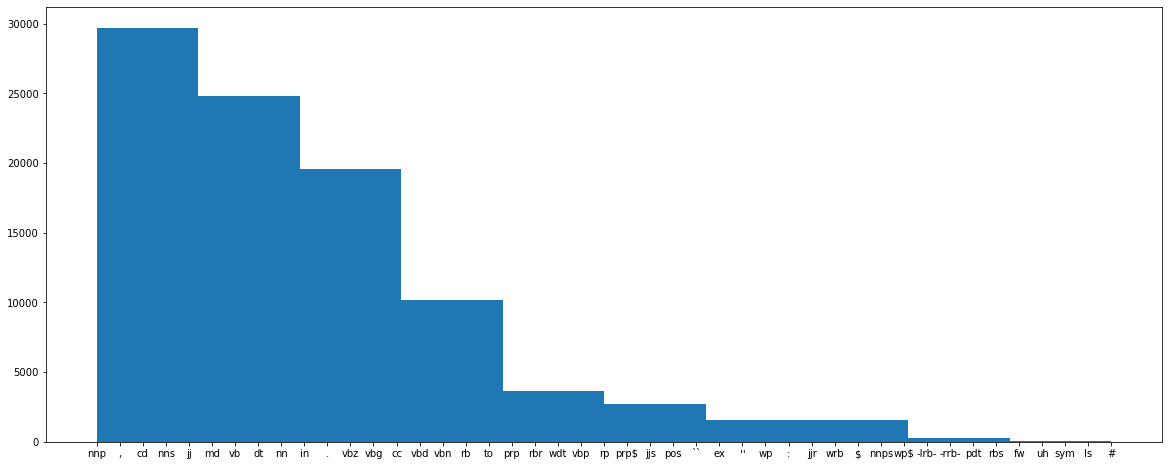

In [15]:
#Plotting the distribution of the classes
fig_size = plt.rcParams["figure.figsize"]
default = fig_size
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

#create an array with all the words in the dataframe and then plot it
df_completed_tag = [x.strip() for i in range(len(df.label)) for x in df.label[i].split() ] 
plt.hist(df_completed_tag)
plt.show()


### Tokenizer

In [16]:
from keras.preprocessing.text import Tokenizer

In [17]:
# encode X

word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts([df.sentence[i].split() for i in range(df.shape[0])])                    # fit tokeniser on data
X_encoded = word_tokenizer.texts_to_sequences([df.sentence[i].split() for i in range(df.shape[0])])  # use the tokeniser to encode input sequence

In [18]:
# encode Y, same way of X

tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(df.label[i].split() for i in range(df.shape[0]))
Y_encoded = tag_tokenizer.texts_to_sequences(df.label[i].split() for i in range(df.shape[0]))

In [19]:
# look at first encoded data point

print("** Raw data point **", "\n", "-"*100, "\n")
print('X: ', df.sentence[0], '\n')
print('Y: ', df.label[0], '\n')
print()
print("** Encoded data point **", "\n", "-"*100, "\n")
print('X: ', X_encoded[0], '\n')
print('Y: ', Y_encoded[0], '\n')



** Raw data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  pierre vinken , 61 years old , will join the board as a nonexecutive director nov. 29 . mr. vinken is chairman of elsevier n.v. , the dutch publishing group .  

Y:  nnp nnp , cd nns jj , md vb dt nn in dt jj nn nnp cd . nnp nnp vbz nn in nnp nnp , dt nnp vbg nn .  


** Encoded data point ** 
 ---------------------------------------------------------------------------------------------------- 

X:  [5419, 3714, 1, 2005, 78, 316, 1, 39, 2383, 2, 122, 22, 6, 2006, 317, 444, 2007, 3, 26, 3714, 15, 167, 4, 5420, 2890, 1, 2, 2891, 621, 137, 3] 

Y:  [3, 3, 7, 9, 5, 6, 7, 20, 12, 4, 1, 2, 4, 6, 1, 3, 9, 8, 3, 3, 16, 1, 2, 3, 3, 7, 4, 3, 18, 1, 8] 



In [20]:
import re

In [21]:
# save the label for each sentences that are not punctation

tagg = re.compile('[a-z]') # re for label that are letter nad not punctation

good_idxs = [] # save the indexes of label that are not punctation

# for all the sentences, see all the labels and save the one that are not punctation
for j in range(df.shape[0]):
    good_idx = []

    for i in range(len(df.sentence[j].split())):
        curr_lab = df.label[j].split()[i]
        if tagg.search(curr_lab) and Y_encoded[j][i] not in good_idx and curr_lab != "sym" and curr_lab != "-lrb-" and curr_lab != "-rrb-":
            good_idx.append(Y_encoded[j][i])

                
    good_idx = np.sort(good_idx)
    good_idxs.append(good_idx)


    


In [22]:
# make sure that each sequence of input and output is same length

different_length = [1 if len(input) != len(output) else 0 for input, output in zip(X_encoded, Y_encoded)]
print("{} sentences have disparate input-output lengths.".format(sum(different_length)))

0 sentences have disparate input-output lengths.


### Split data in train, val and test set

In [23]:
from keras.utils import pad_sequences

In [24]:
# Pad each sequence to max_seq_length using KERAS' pad_sequences() function. 
# Sentences longer than max_seq_length are truncated.
# Sentences shorter than max_seq_length are padded with zeroes.

# Truncation and padding can either be 'pre' or 'post'. 
# For padding we are using 'post' padding type, that is, add zeroes on the right side.
# For truncation, we are using 'post', that is, truncate a sentence from right side.

max_seq_length = 100  # sequences greater than 100 in length will be truncated

X_padded = pad_sequences(X_encoded, maxlen=max_seq_length, padding="post", truncating="post")
Y_padded = pad_sequences(Y_encoded, maxlen=max_seq_length, padding="post", truncating="post")



In [25]:
# print the first sequence
print(X_padded[0])
print(Y_padded[0])

[5419 3714    1 2005   78  316    1   39 2383    2  122   22    6 2006
  317  444 2007    3   26 3714   15  167    4 5420 2890    1    2 2891
  621  137    3    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[ 3  3  7  9  5  6  7 20 12  4  1  2  4  6  1  3  9  8  3  3 16  1  2  3
  3  7  4  3 18  1  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


In [26]:
print(X_padded.shape)
print(Y_padded.shape)

(199, 100)
(199, 100)


In [27]:
#add padding to tokenizer
word_tokenizer.word_index['0'] = 0
tag_tokenizer.word_index['0'] = 0

In [28]:
# assign padded sequences to X and Y
X, Y = X_padded, Y_padded

In [29]:
from keras.utils.np_utils import to_categorical

In [30]:
# use Keras' to_categorical function to one-hot encode Y
Y = to_categorical(Y)

In [31]:
# divide the df in train, val and test set
x_train = X[:100]
y_train = Y[:100]
x_val = X[100:150]
y_val = Y[100:150]
x_test = X[150:200]
y_test = Y[150:200]

In [32]:
# print number of samples in each set
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(x_train.shape))
print('Shape of output sequences: {}'.format(y_train.shape))
print("-"*50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(x_val.shape))
print('Shape of output sequences: {}'.format(y_val.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(x_test.shape))
print('Shape of output sequences: {}'.format(y_test.shape))

TRAINING DATA
Shape of input sequences: (100, 100)
Shape of output sequences: (100, 100, 46)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (50, 100)
Shape of output sequences: (50, 100, 46)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (49, 100)
Shape of output sequences: (49, 100, 46)


In [33]:
num_classes = y_train.shape[2] # number of classes

## Part 2

### Vocabulary

Embed the words using GloVe embeddings

In [34]:
import gensim
import gensim.downloader as gloader

In [35]:
embedding_dimension = 50 # [50, 100, 200, 300] possibility
# download and load the vocabulary glove
download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
embedding_model = gloader.load(download_path)

In [36]:
# assign word vectors from glove model

vocab_size = len(word_tokenizer.word_index) + 1

# create an empty embedding matix
embedding_vector = np.zeros((vocab_size, embedding_dimension))

# create a word to index dictionary mapping
word2id = word_tokenizer.word_index

# copy vectors from glove model to the words present in corpus, OOV words set to 0
for word, index in word2id.items():
    try:
        embedding_vector[index] = embedding_model[word]
    except KeyError:
        embedding_vector [index] = np.zeros(embedding_dimension) 



In [37]:
# check embedding dimension
print("Embeddings shape: {}".format(embedding_vector.shape))

Embeddings shape: (10949, 50)


In [38]:
# print an example
embedding_vector[word_tokenizer.word_index['pierre']]

array([ 0.23568   ,  0.39638001, -0.60135001, -0.52680999,  0.15877999,
        0.035317  , -1.38549995, -0.050794  , -0.59138   ,  0.28227001,
        0.75602001,  0.17395   , -1.4483    ,  0.18503   ,  0.33835   ,
       -0.71196997,  0.93379998, -1.1688    , -0.064745  , -0.63867003,
       -0.46408999,  1.1839    , -0.43759   , -0.089778  , -0.95805001,
        0.012933  , -0.64701003, -0.28791001,  0.071964  ,  1.43089998,
        0.44505   , -0.27070999, -1.6473    ,  0.006484  ,  0.46397001,
       -0.21664999,  0.1401    ,  0.91751999,  1.12779999,  1.44350004,
        0.85627002,  1.25049996,  0.39963999, -1.38629997, -0.331     ,
        0.48466   , -1.45039999, -0.2049    ,  0.77636999,  0.23190001])


## Part 3

baseline model
BiLSTM and TimeDistributed Dense

In [39]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, TimeDistributed, Dense, Embedding
import keras

In [40]:
# create architecture

bidirectional_model = Sequential()
bidirectional_model.add(Embedding(input_dim     = vocab_size,
                             output_dim    = embedding_dimension,
                             input_length  = max_seq_length,
                             weights       = [embedding_vector],
                             trainable     = False
))
bidirectional_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bidirectional_model.add(TimeDistributed(Dense(num_classes, activation='softmax')))

In [41]:
bidirectional_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])

In [42]:
bidirectional_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           547450    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         58880     
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 100, 46)          5934      
 ibuted)                                                         
                                                                 
Total params: 612,264
Trainable params: 64,814
Non-trainable params: 547,450
_________________________________________________________________


In [43]:
bidirectional_train = bidirectional_model.fit(x_train, y_train, batch_size=10, epochs = 20, validation_data=(x_val, y_val))

Epoch 1/20
10/10 [==============================] - 4s 145ms/step - loss: 3.3159 - acc: 0.2121 - val_loss: 3.1162 - val_acc: 0.1568
Epoch 2/20
10/10 [==============================] - 0s 39ms/step - loss: 2.7033 - acc: 0.2563 - val_loss: 2.8114 - val_acc: 0.2472
Epoch 3/20
10/10 [==============================] - 0s 39ms/step - loss: 2.5057 - acc: 0.3072 - val_loss: 2.6997 - val_acc: 0.2846
Epoch 4/20
10/10 [==============================] - 0s 39ms/step - loss: 2.3942 - acc: 0.3711 - val_loss: 2.5869 - val_acc: 0.3324
Epoch 5/20
10/10 [==============================] - 0s 38ms/step - loss: 2.2964 - acc: 0.3948 - val_loss: 2.4827 - val_acc: 0.3874
Epoch 6/20
10/10 [==============================] - 0s 39ms/step - loss: 2.2021 - acc: 0.4383 - val_loss: 2.3809 - val_acc: 0.3974
Epoch 7/20
10/10 [==============================] - 0s 39ms/step - loss: 2.1020 - acc: 0.4569 - val_loss: 2.2739 - val_acc: 0.4236
Epoch 8/20
10/10 [==============================] - 0s 38ms/step - loss: 1.9991 - 

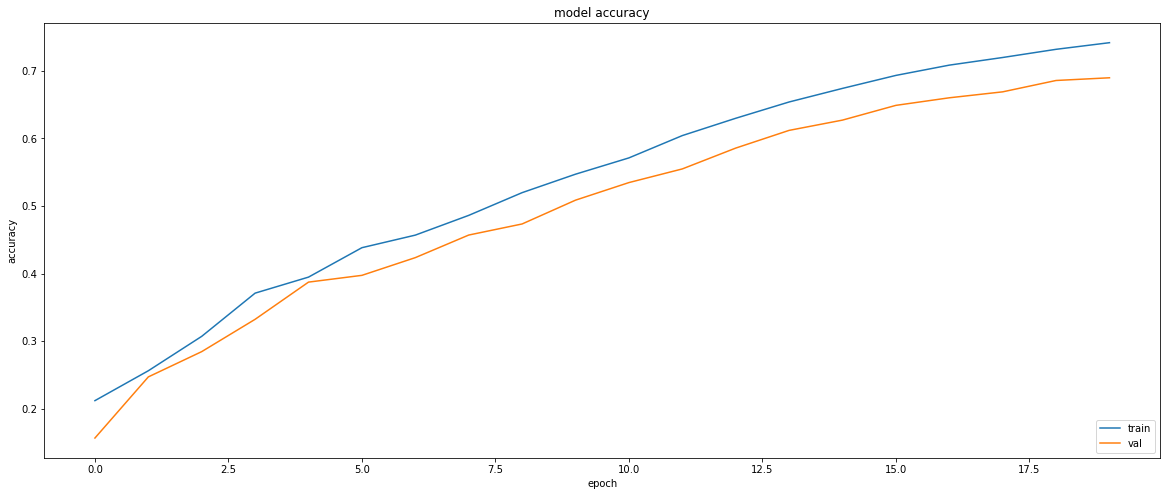

In [44]:
# visualise training history
plt.plot(bidirectional_train.history['acc'])
plt.plot(bidirectional_train.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="lower right")
plt.show()

## Part 4

experiment doing small modification

### Architecture 1

Gru and Time Distributed Dense

In [45]:
from keras.layers import GRU

In [46]:
# create architecture

GRU_model = Sequential()
GRU_model.add(Embedding(input_dim     = vocab_size,
                             output_dim    = embedding_dimension,
                             input_length  = max_seq_length,
                             weights       = [embedding_vector],
                             trainable     = False
))
GRU_model.add(GRU(64, return_sequences=True))
GRU_model.add(TimeDistributed(Dense(num_classes, activation='softmax')))

In [47]:
GRU_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])

In [48]:
GRU_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           547450    
                                                                 
 gru (GRU)                   (None, 100, 64)           22272     
                                                                 
 time_distributed_1 (TimeDis  (None, 100, 46)          2990      
 tributed)                                                       
                                                                 
Total params: 572,712
Trainable params: 25,262
Non-trainable params: 547,450
_________________________________________________________________


In [49]:
GRU_train = GRU_model.fit(x_train, y_train, batch_size=10, epochs = 20, validation_data=(x_val, y_val))

Epoch 1/20
10/10 [==============================] - 2s 80ms/step - loss: 3.6445 - acc: 0.1239 - val_loss: 3.4803 - val_acc: 0.1666
Epoch 2/20
10/10 [==============================] - 0s 31ms/step - loss: 3.1208 - acc: 0.2797 - val_loss: 3.1562 - val_acc: 0.2242
Epoch 3/20
10/10 [==============================] - 0s 32ms/step - loss: 2.7891 - acc: 0.3058 - val_loss: 2.8866 - val_acc: 0.2424
Epoch 4/20
10/10 [==============================] - 0s 33ms/step - loss: 2.5441 - acc: 0.3354 - val_loss: 2.6800 - val_acc: 0.3158
Epoch 5/20
10/10 [==============================] - 0s 32ms/step - loss: 2.3842 - acc: 0.4182 - val_loss: 2.5433 - val_acc: 0.3864
Epoch 6/20
10/10 [==============================] - 0s 32ms/step - loss: 2.2603 - acc: 0.4440 - val_loss: 2.4183 - val_acc: 0.4024
Epoch 7/20
10/10 [==============================] - 0s 31ms/step - loss: 2.1464 - acc: 0.4702 - val_loss: 2.2982 - val_acc: 0.4390
Epoch 8/20
10/10 [==============================] - 0s 30ms/step - loss: 2.0379 - a

In [50]:
plt.rcParams["figure.figsize"] = (10,5)

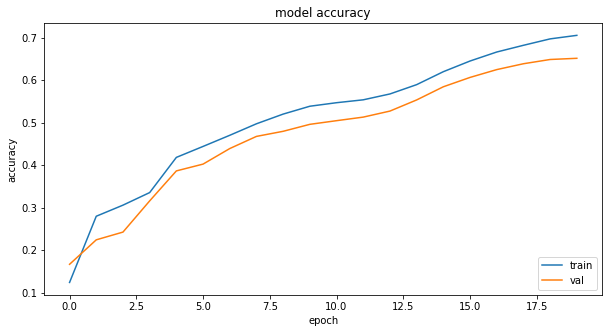

In [51]:
# visualise training history
plt.plot(GRU_train.history['acc'])
plt.plot(GRU_train.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="lower right")
plt.show()

### Architecture 2

2 LSTM layer and Time Distributed Dense

In [52]:
# create architecture

doublebidir_model = Sequential()
doublebidir_model.add(Embedding(input_dim     = vocab_size,
                             output_dim    = embedding_dimension,
                             input_length  = max_seq_length,
                             weights       = [embedding_vector],
                             trainable     = False
))
doublebidir_model.add(Bidirectional(LSTM(64, return_sequences=True)))
doublebidir_model.add(Bidirectional(LSTM(64, return_sequences=True)))
doublebidir_model.add(TimeDistributed(Dense(num_classes, activation='softmax')))

In [53]:
doublebidir_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])

In [54]:
doublebidir_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           547450    
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 128)         58880     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 128)         98816     
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, 100, 46)          5934      
 tributed)                                                       
                                                                 
Total params: 711,080
Trainable params: 163,630
Non-trainable params: 547,450
__________________________________________

In [55]:
doublebidir_train = doublebidir_model.fit(x_train, y_train, batch_size=10, epochs = 20, validation_data=(x_val, y_val))

Epoch 1/20
10/10 [==============================] - 8s 228ms/step - loss: 3.3601 - acc: 0.2142 - val_loss: 3.0721 - val_acc: 0.1988
Epoch 2/20
10/10 [==============================] - 1s 71ms/step - loss: 2.6914 - acc: 0.2722 - val_loss: 2.8564 - val_acc: 0.2050
Epoch 3/20
10/10 [==============================] - 1s 71ms/step - loss: 2.5567 - acc: 0.2848 - val_loss: 2.7994 - val_acc: 0.2080
Epoch 4/20
10/10 [==============================] - 1s 71ms/step - loss: 2.5029 - acc: 0.2880 - val_loss: 2.7442 - val_acc: 0.2256
Epoch 5/20
10/10 [==============================] - 1s 71ms/step - loss: 2.4498 - acc: 0.3106 - val_loss: 2.6860 - val_acc: 0.2268
Epoch 6/20
10/10 [==============================] - 1s 71ms/step - loss: 2.3867 - acc: 0.3190 - val_loss: 2.6095 - val_acc: 0.2752
Epoch 7/20
10/10 [==============================] - 1s 71ms/step - loss: 2.3109 - acc: 0.3506 - val_loss: 2.5126 - val_acc: 0.3136
Epoch 8/20
10/10 [==============================] - 1s 71ms/step - loss: 2.2136 - 

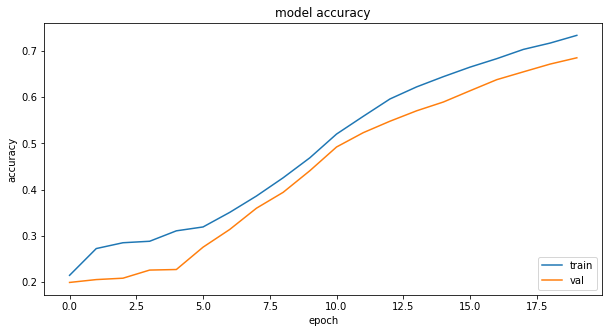

In [56]:
# visualise training history
plt.plot(doublebidir_train.history['acc'])
plt.plot(doublebidir_train.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="lower right")
plt.show()

 ### Architecture 3
 
 2 Time Distributed Dense

In [57]:
# create architecture

doubledense_model = Sequential()
doubledense_model.add(Embedding(input_dim     = vocab_size,
                             output_dim    = embedding_dimension,
                             input_length  = max_seq_length,
                             weights       = [embedding_vector],
                             trainable     = False
))
doubledense_model.add(Bidirectional(LSTM(64, return_sequences=True)))
doubledense_model.add(TimeDistributed(Dense(num_classes, activation='softmax')))
doubledense_model.add(TimeDistributed(Dense(num_classes, activation='softmax')))

In [58]:
doubledense_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])

In [59]:
doubledense_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           547450    
                                                                 
 bidirectional_3 (Bidirectio  (None, 100, 128)         58880     
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 100, 46)          5934      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 100, 46)          2162      
 tributed)                                                       
                                                                 
Total params: 614,426
Trainable params: 66,976
Non-trainable params: 547,450
___________________________________________

In [60]:
doubledense_train = doubledense_model.fit(x_train, y_train, batch_size=10, epochs = 20, validation_data=(x_val, y_val))

Epoch 1/20
10/10 [==============================] - 4s 125ms/step - loss: 3.8068 - acc: 0.0889 - val_loss: 3.7888 - val_acc: 0.1536
Epoch 2/20
10/10 [==============================] - 0s 38ms/step - loss: 3.7576 - acc: 0.2504 - val_loss: 3.7462 - val_acc: 0.1956
Epoch 3/20
10/10 [==============================] - 0s 46ms/step - loss: 3.7116 - acc: 0.2208 - val_loss: 3.7069 - val_acc: 0.1480
Epoch 4/20
10/10 [==============================] - 0s 41ms/step - loss: 3.6735 - acc: 0.1549 - val_loss: 3.6739 - val_acc: 0.1854
Epoch 5/20
10/10 [==============================] - 0s 39ms/step - loss: 3.6433 - acc: 0.1732 - val_loss: 3.6488 - val_acc: 0.1878
Epoch 6/20
10/10 [==============================] - 0s 39ms/step - loss: 3.6172 - acc: 0.2524 - val_loss: 3.6249 - val_acc: 0.1874
Epoch 7/20
10/10 [==============================] - 0s 40ms/step - loss: 3.5927 - acc: 0.2546 - val_loss: 3.6022 - val_acc: 0.1864
Epoch 8/20
10/10 [==============================] - 0s 43ms/step - loss: 3.5690 - 

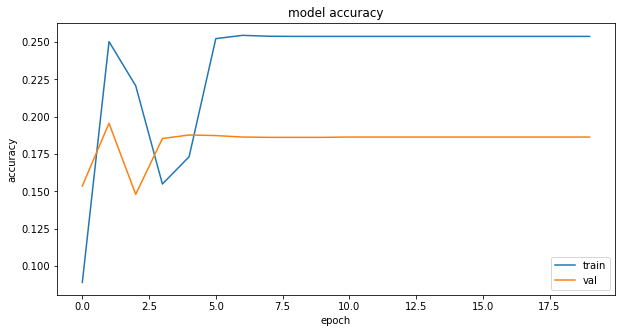

In [61]:
# visualise training history
plt.plot(doubledense_train.history['acc'])
plt.plot(doubledense_train.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="lower right")
plt.show()

## Part 5

### Evaluate yourt best 2 model

as we can see from the val_loss the best two model are the base model, with 1 layer biLSTM and 1 TimeDistributed, and the architecture 2, with 2 layer biLSTM and 1 TimeDistributed

In [62]:
from sklearn.metrics import f1_score

In [63]:
# function that predict the data with a model given in input

def predict_data(model: keras.Model,
                 x: np.ndarray,
                 prediction_info: Dict) -> np.ndarray:
    
    """
    Inference routine of a given input set of examples

    :param model: Keras built and possibly trained model
    :param x: input set of examples in np.ndarray format
    :param prediction_info: dictionary storing model predict() argument information

    :return
        predictions: predicted labels in np.ndarray format
    """
    print(f'Starting prediction: \n{prediction_info}')
    print(f'Predicting on {x.shape[0]} samples')
    predictions = model.predict(x, **prediction_info)
    return predictions

In [64]:
# parameters of prediction
prediction_info = {
    'batch_size': 10,
    'verbose': 1
}

In [65]:
# predict the data with the first model 
y_pred_bidi = predict_data(model=bidirectional_model, x=x_test,
                                      prediction_info=prediction_info)
y_pred_bidi_unp = np.argmax(y_pred_bidi, axis=-1) # remove padding

Starting prediction: 
{'batch_size': 10, 'verbose': 1}
Predicting on 49 samples
5/5 [==============================] - 1s 11ms/step


In [66]:
# predict the data with the second model 
y_pred_doubledir = predict_data(model=doublebidir_model, x=x_test,
                                      prediction_info=prediction_info)
y_pred_doubledir_unp = np.argmax(y_pred_doubledir, axis=-1) # remove padding

Starting prediction: 
{'batch_size': 10, 'verbose': 1}
Predicting on 49 samples
5/5 [==============================] - 1s 21ms/step


In [67]:
# remove padding
y_test_unp = np.argmax(y_test, axis=-1)

In [68]:
# function that compute the F1 score from the y_true and y_predicted

def evaluate_predictions(predictions: np.ndarray,
                         y: np.ndarray):
    
    scoreF1 = []
    # for every sentences compute the F1 score, then compute the F1 score of all the test set
    for i in range(y_test_unp.shape[0]):

        #ignore the labels that are punctation
        scoreF1.append(f1_score(y_true=y[i], y_pred=predictions[i], average='macro', labels=good_idxs[i], zero_division=0))
        
    return (sum(scoreF1) / len(scoreF1))
    

In [69]:
# compute F1 score of first model
F1_bidi = evaluate_predictions(y_pred_bidi_unp, y_test_unp)
print(F1_bidi)

0.40270966272958625


In [70]:
# compute F1 score of second model
F1_doubledir = evaluate_predictions(predictions=y_pred_doubledir_unp, y = y_test_unp)
print(F1_doubledir)

0.4047275746798751


The first model (Bidirectional LSTM and Dense/Fully-Connected layer) has a slightly better F1 score than the other model (2 Bidirectional LSTM and 1 Dense/Fully-Connected layer), so it's the best model

## Part 6

## Analyze the errors


I will do the classification report and confusion matrix for validation and test set

In [71]:
# remove padding
y_val_unp = np.argmax(y_val, axis=-1)

In [72]:
# predict the data with the first model 
y_pred_bidi_val = predict_data(model=bidirectional_model, x=x_val,
                                      prediction_info=prediction_info)
y_pred_bidi_val_unp = np.argmax(y_pred_bidi, axis=-1) # remove padding

# predict the data with the second model 
y_pred_doubledir_val = predict_data(model=doublebidir_model, x=x_val,
                                      prediction_info=prediction_info)
y_pred_doubledir_val_unp = np.argmax(y_pred_doubledir, axis=-1) # remove padding

Starting prediction: 
{'batch_size': 10, 'verbose': 1}
Predicting on 50 samples
5/5 [==============================] - 0s 12ms/step
Starting prediction: 
{'batch_size': 10, 'verbose': 1}
Predicting on 50 samples
5/5 [==============================] - 0s 20ms/step


In [73]:
# digit to tokens of the prediction
prediction_bidi = tag_tokenizer.sequences_to_texts(y_pred_bidi_unp)
prediction_doubledir = tag_tokenizer.sequences_to_texts(y_pred_doubledir_unp)
prediction_true = tag_tokenizer.sequences_to_texts(y_test_unp)

prediction_true_val = tag_tokenizer.sequences_to_texts(y_val_unp)

In [74]:
# as input we take the predicted and the true label, we compute the percentage error of the prediction
# and if printing=True we print the missclassified label
def showing_predictions(pred, true, printing=True):
    
    count_error = 0 #counter of the missclassification
    count_total = 0 #count of all the label
    
    for i in range(len(pred)):
        for j in range(len(pred[i].split())):
            
            count_total += 1
            if pred[i].split()[j] != true[i].split()[j]:
                
                if printing==True:
                    
                    print("Predicted word as: ", pred[i].split()[j])
                    print("Actual label: ", true[i].split()[j], "\n")
                    
                count_error += 1
     
    return count_error/count_total

Here we show the percentage of the wrong prediction of the model. We can see that is around 30%, that is correct because the accuracy was around 70%

I will print the missclassification only for the first model.
Here we can see there are many error for the label "nn"

In [75]:
bidi_error = showing_predictions(prediction_bidi, prediction_true, True)
print('{:.2%}'.format(bidi_error))

Predicted word as:  nn
Actual label:  nns 

Predicted word as:  .
Actual label:  cc 

Predicted word as:  cd
Actual label:  nn 

Predicted word as:  nn
Actual label:  prp$ 

Predicted word as:  in
Actual label:  cc 

Predicted word as:  jj
Actual label:  nn 

Predicted word as:  nn
Actual label:  vbz 

Predicted word as:  cd
Actual label:  nn 

Predicted word as:  cd
Actual label:  nn 

Predicted word as:  to
Actual label:  md 

Predicted word as:  rb
Actual label:  vbg 

Predicted word as:  jj
Actual label:  nns 

Predicted word as:  vbd
Actual label:  rb 

Predicted word as:  nn
Actual label:  vbg 

Predicted word as:  nnp
Actual label:  vb 

Predicted word as:  nn
Actual label:  vbn 

Predicted word as:  vbd
Actual label:  in 

Predicted word as:  dt
Actual label:  cd 

Predicted word as:  nn
Actual label:  nnp 

Predicted word as:  nnp
Actual label:  cc 

Predicted word as:  vbn
Actual label:  vbd 

Predicted word as:  nnp
Actual label:  jj 

Predicted word as:  .
Actual label:  in

Predicted word as:  vb
Actual label:  md 

Predicted word as:  nn
Actual label:  vb 

Predicted word as:  dt
Actual label:  prp$ 

Predicted word as:  in
Actual label:  vbg 

Predicted word as:  nns
Actual label:  vbn 

Predicted word as:  in
Actual label:  cc 

Predicted word as:  nn
Actual label:  nns 

Predicted word as:  in
Actual label:  wdt 

Predicted word as:  vb
Actual label:  rb 

Predicted word as:  nns
Actual label:  vbn 

Predicted word as:  in
Actual label:  . 

Predicted word as:  vb
Actual label:  md 

Predicted word as:  in
Actual label:  rp 

Predicted word as:  nn
Actual label:  nns 

Predicted word as:  nns
Actual label:  vbn 

Predicted word as:  in
Actual label:  wrb 

Predicted word as:  nn
Actual label:  nns 

Predicted word as:  jj
Actual label:  jjs 

Predicted word as:  nn
Actual label:  jj 

Predicted word as:  nn
Actual label:  nns 

Predicted word as:  nns
Actual label:  vbd 

Predicted word as:  dt
Actual label:  pos 

Predicted word as:  nn
Actual label:

Actual label:  nn 

Predicted word as:  nn
Actual label:  pos 

Predicted word as:  nn
Actual label:  nns 

Predicted word as:  nn
Actual label:  jj 

Predicted word as:  in
Actual label:  wdt 

Predicted word as:  nn
Actual label:  vbz 

Predicted word as:  nns
Actual label:  nn 

Predicted word as:  in
Actual label:  vbg 

Predicted word as:  jj
Actual label:  nn 

Predicted word as:  vbd
Actual label:  rb 

Predicted word as:  nn
Actual label:  vbd 

Predicted word as:  nn
Actual label:  nnp 

Predicted word as:  nn
Actual label:  jj 

Predicted word as:  nn
Actual label:  nns 

Predicted word as:  .
Actual label:  cd 

Predicted word as:  dt
Actual label:  prp$ 

Predicted word as:  nn
Actual label:  jj 

Predicted word as:  .
Actual label:  md 

Predicted word as:  nn
Actual label:  vbn 

Predicted word as:  nns
Actual label:  jj 

Predicted word as:  nnp
Actual label:  jj 

Predicted word as:  nnp
Actual label:  jj 

Predicted word as:  nnp
Actual label:  nn 

Predicted word as: 

Actual label:  vbd 

Predicted word as:  in
Actual label:  rp 

Predicted word as:  nn
Actual label:  vbg 

Predicted word as:  dt
Actual label:  prp$ 

Predicted word as:  nnp
Actual label:  nnps 

Predicted word as:  nn
Actual label:  nns 

Predicted word as:  nn
Actual label:  vbg 

Predicted word as:  cd
Actual label:  nn 

Predicted word as:  nns
Actual label:  dt 

Predicted word as:  nn
Actual label:  nns 

Predicted word as:  nn
Actual label:  jj 

Predicted word as:  nnp
Actual label:  vbn 

Predicted word as:  nn
Actual label:  in 

Predicted word as:  vb
Actual label:  rb 

Predicted word as:  jj
Actual label:  nn 

Predicted word as:  in
Actual label:  jj 

Predicted word as:  nnp
Actual label:  nn 

Predicted word as:  vb
Actual label:  vbg 

Predicted word as:  in
Actual label:  cc 

Predicted word as:  ,
Actual label:  cc 

Predicted word as:  nn
Actual label:  vbg 

Predicted word as:  nns
Actual label:  jj 

Predicted word as:  nn
Actual label:  nnp 

Predicted word as

Predicted word as:  nn
Actual label:  nns 

Predicted word as:  nns
Actual label:  jj 

Predicted word as:  in
Actual label:  nns 

Predicted word as:  dt
Actual label:  jj 

Predicted word as:  .
Actual label:  cc 

Predicted word as:  nns
Actual label:  jjr 

Predicted word as:  vb
Actual label:  md 

Predicted word as:  nn
Actual label:  vb 

Predicted word as:  in
Actual label:  pos 

Predicted word as:  in
Actual label:  . 

Predicted word as:  nnp
Actual label:  -lrb- 

Predicted word as:  nnp
Actual label:  -rrb- 

Predicted word as:  nnp
Actual label:  : 

Predicted word as:  nnp
Actual label:  vbg 

Predicted word as:  nnp
Actual label:  nnps 

Predicted word as:  nn
Actual label:  nns 

Predicted word as:  jj
Actual label:  nns 

Predicted word as:  dt
Actual label:  prp 

Predicted word as:  nn
Actual label:  vbz 

Predicted word as:  vbz
Actual label:  `` 

Predicted word as:  dt
Actual label:  nnp 

Predicted word as:  nn
Actual label:  nnp 

Predicted word as:  nnp
Actual

Predicted word as:  nns
Actual label:  vbg 

Predicted word as:  in
Actual label:  dt 

Predicted word as:  jj
Actual label:  nn 

Predicted word as:  nns
Actual label:  vbg 

Predicted word as:  nns
Actual label:  vb 

Predicted word as:  nns
Actual label:  vbp 

Predicted word as:  vb
Actual label:  rb 

Predicted word as:  nnp
Actual label:  vbd 

Predicted word as:  in
Actual label:  cd 

Predicted word as:  dt
Actual label:  prp$ 

Predicted word as:  nn
Actual label:  nnp 

Predicted word as:  jj
Actual label:  vbd 

Predicted word as:  jj
Actual label:  vbn 

Predicted word as:  nns
Actual label:  vb 

Predicted word as:  nnp
Actual label:  jj 

Predicted word as:  nn
Actual label:  vbn 

Predicted word as:  nn
Actual label:  nnp 

Predicted word as:  nn
Actual label:  vbg 

Predicted word as:  cd
Actual label:  nn 

Predicted word as:  jj
Actual label:  nn 

Predicted word as:  dt
Actual label:  in 

Predicted word as:  nn
Actual label:  vbn 

Predicted word as:  nn
Actual labe

In [76]:
doubledir_error = showing_predictions(prediction_doubledir, prediction_true, False)
print('{:.2%}'.format(doubledir_error))

30.27%


## Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn

In [78]:
#find all the possible label in the test set
label_test = [x.strip() for i in range(len(prediction_true)) for x in prediction_true[i].split() ] 
label_test = np.unique(label_test)
label_test = np.insert(label_test, 0, 0) #add the padding option

In [79]:
#find all the possible label in the test set
label_val = [x.strip() for i in range(len(prediction_true_val)) for x in prediction_true_val[i].split() ] 
label_val = np.unique(label_val)
label_val = np.insert(label_val, 0, 0) #add the padding option

In [80]:
# take as input the true and the predicted label, plot the confusion matrix and compute the total amount of
# correct label, number of sentece, correct label without punctation, wrong labels, number of punctation

def plot_cm(true, pred, label):
    
    eq = 0 #correct label
    not_eq = 0 #wrong label
    zeros = 0 #punctation
    cm = confusion_matrix(true, pred) #confusion matrix
    
    #plot confusion matrix
    fig = plt.figure(figsize=(18,15))
    ax= plt.subplot()
    seaborn.heatmap(cm, annot=True, fmt="d", xticklabels=label, yticklabels=label, ax=ax)
    ax.set_title('Confusion matrix')
    ax.set_ylabel('Actual label')
    ax.set_xlabel('Predicted label')
    
    punct_idx = [x for x, elem in enumerate(label) if not tagg.search(elem)] #index of punctation
    
    #for each label control if true = pred, then if it is punctation or not
    for i in range(0,len(cm)):
        for j in range(0,len(cm[i])):
            if not cm[i][j] == 0 and i == j:
                eq += cm[i][j]
                if i in(punct_idx):
                    zeros += cm[i][j]   
            elif not cm[i][j] == 0 and i!=j:
                not_eq += cm[i][j]
                
    eq_true = eq - zeros #label that are sentence and not punctation

    print('Correct Labels: ' , eq)
    print('Sentence length: ',(eq + not_eq)-zeros )
    print('Correct Labels (without punctuation): ', eq_true)
    print('Wrong Labels: ', not_eq)
    print('Punctuation:', zeros)




We can see there are many errors and that are mostly for the punctation and the classes: cd, jjs

Val set and test set result are coherent, the class with most error are almost the same

Correct Labels:  3579
Sentence length:  2641
Correct Labels (without punctuation):  1320
Wrong Labels:  1321
Punctuation: 2259


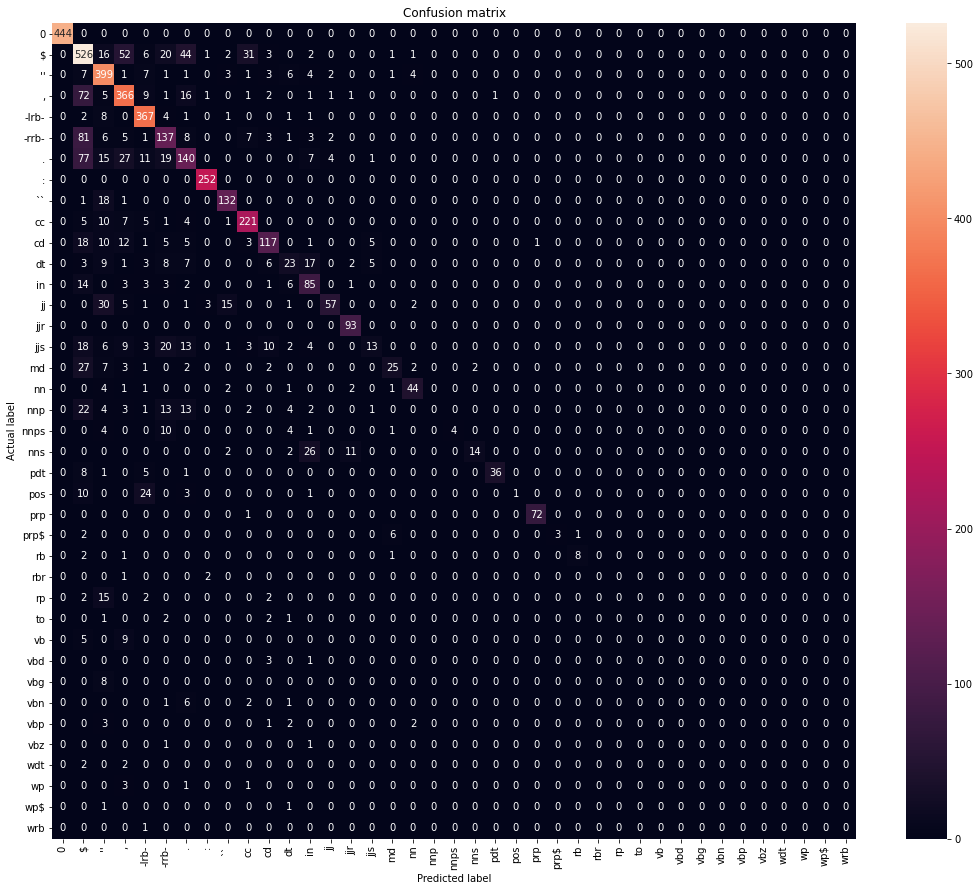

In [81]:
#confusion matrix for test set
plot_cm(y_test.argmax(axis=2).flatten(), y_pred_bidi.argmax(axis=2).flatten(), label_test)

Correct Labels:  3448
Sentence length:  2388
Correct Labels (without punctuation):  836
Wrong Labels:  1552
Punctuation: 2612


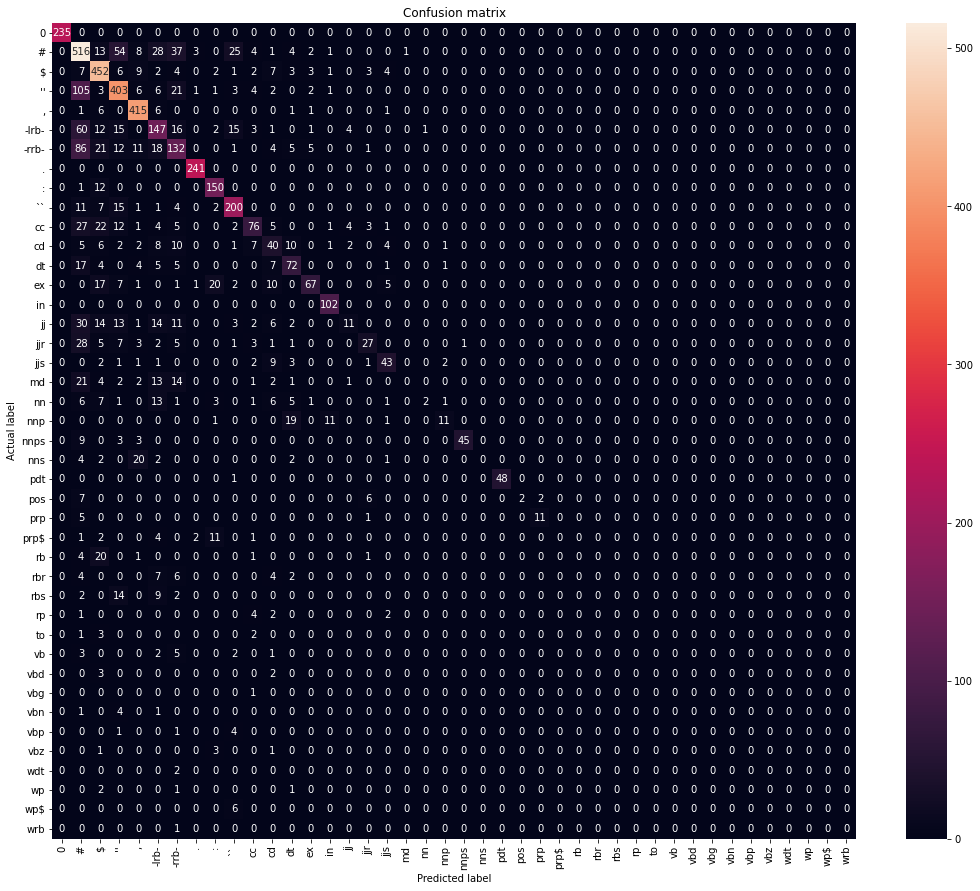

In [82]:
#confusion matrix for val set
plot_cm(y_val.argmax(axis=2).flatten(), y_pred_bidi_val.argmax(axis=2).flatten(), label_val)

the second model is quite similar to the first one, most of the error for punctation and the class jjs


Correct Labels:  3551
Sentence length:  2633
Correct Labels (without punctuation):  1284
Wrong Labels:  1349
Punctuation: 2267


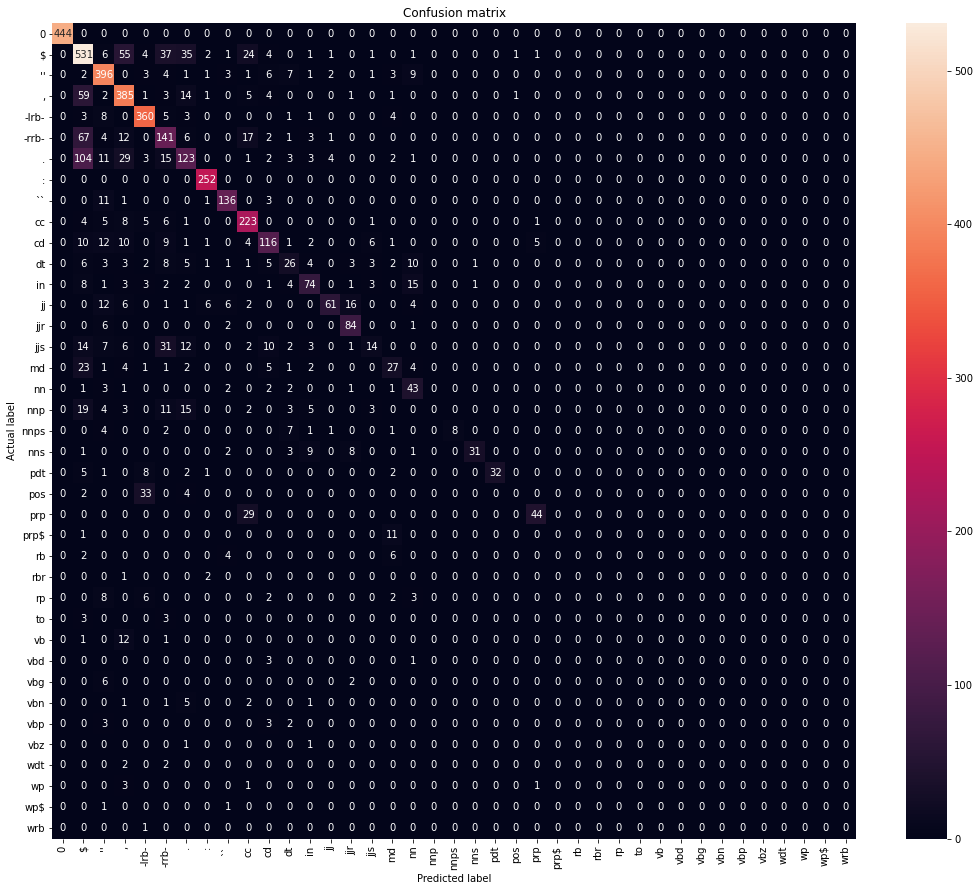

In [83]:
#confusion matrix for test set
plot_cm(y_test.argmax(axis=2).flatten(), y_pred_doubledir.argmax(axis=2).flatten(), label_test)

Correct Labels:  3427
Sentence length:  2377
Correct Labels (without punctuation):  804
Wrong Labels:  1573
Punctuation: 2623


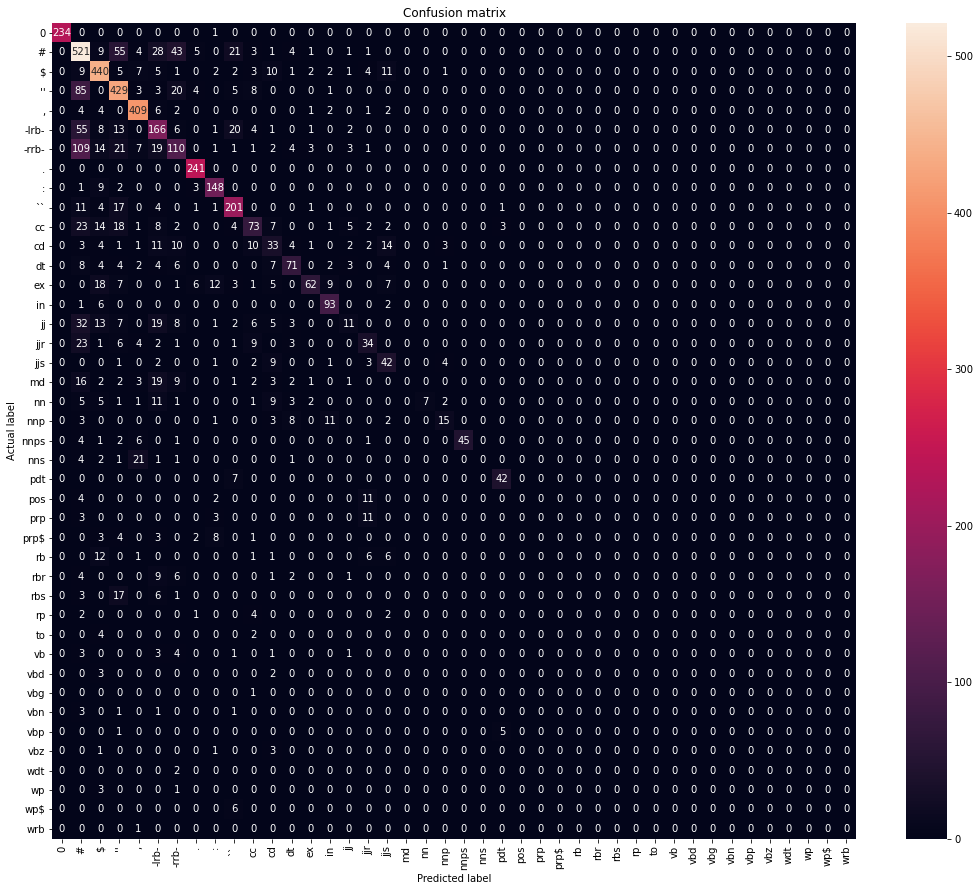

In [84]:
#confusion matrix for val set
plot_cm(y_val.argmax(axis=2).flatten(), y_pred_doubledir_val.argmax(axis=2).flatten(), label_val)

## Classification report

In [85]:
from sklearn.metrics import classification_report

In [86]:
def report(true, pred, label):
    
    print(classification_report(true, pred, target_names=label, zero_division=0))
    

We plot the classification report for the first model, we can notice that the results are nice, most of the labels have high values (punctation and not), for example prp is 0.99 in all three in the test set

While there are few labels that have 0.00 for each class

The classes value are similar in both the test and val set

In [87]:
#classification report for test set
report(y_test.argmax(axis=2).flatten(), y_pred_bidi.argmax(axis=2).flatten(), label_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           $       0.58      0.75      0.65       705
          ''       0.69      0.91      0.78       440
           ,       0.71      0.77      0.74       477
       -lrb-       0.81      0.95      0.88       385
       -rrb-       0.56      0.54      0.55       254
           .       0.52      0.47      0.49       301
           :       0.97      1.00      0.99       252
          ``       0.83      0.87      0.85       152
          cc       0.81      0.87      0.84       254
          cd       0.75      0.66      0.70       178
          dt       0.41      0.27      0.33        84
          in       0.54      0.72      0.62       118
          jj       0.86      0.50      0.63       115
         jjr       0.85      1.00      0.92        93
         jjs       0.52      0.13      0.20       102
          md       0.69      0.35      0.47        71
          nn       0.80    

In [88]:
#classification report for val set
report(y_val.argmax(axis=2).flatten(), y_pred_bidi_val.argmax(axis=2).flatten(), label_val)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           #       0.54      0.74      0.62       697
           $       0.71      0.89      0.79       506
          ''       0.70      0.72      0.71       558
           ,       0.85      0.96      0.90       431
       -lrb-       0.50      0.53      0.52       277
       -rrb-       0.46      0.45      0.46       296
           .       0.97      1.00      0.99       241
           :       0.77      0.92      0.84       163
          ``       0.75      0.83      0.79       241
          cc       0.67      0.47      0.55       163
          cd       0.36      0.40      0.38        99
          dt       0.55      0.62      0.58       116
          ex       0.82      0.51      0.63       131
          in       0.86      1.00      0.93       102
          jj       0.50      0.10      0.17       107
         jjr       0.63      0.32      0.43        84
         jjs       0.67    

We can see that the second model has a quite similar classification report to the first one, the classes with all 0.00 are almost the same; there are little oscillation in the classes

The final values are a little worse, but they don't change a lot from the previous model

In [89]:
#classification report for test set
report(y_test.argmax(axis=2).flatten(), y_pred_doubledir.argmax(axis=2).flatten(), label_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           $       0.61      0.75      0.68       705
          ''       0.77      0.90      0.83       440
           ,       0.71      0.81      0.75       477
       -lrb-       0.84      0.94      0.88       385
       -rrb-       0.50      0.56      0.53       254
           .       0.53      0.41      0.46       301
           :       0.94      1.00      0.97       252
          ``       0.86      0.89      0.88       152
          cc       0.71      0.88      0.79       254
          cd       0.69      0.65      0.67       178
          dt       0.41      0.31      0.35        84
          in       0.67      0.63      0.65       118
          jj       0.87      0.53      0.66       115
         jjr       0.72      0.90      0.80        93
         jjs       0.44      0.14      0.21       102
          md       0.43      0.38      0.40        71
          nn       0.46    

In [90]:
#classification report for val set
report(y_val.argmax(axis=2).flatten(), y_pred_doubledir_val.argmax(axis=2).flatten(), label_val)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           #       0.55      0.75      0.64       697
           $       0.75      0.87      0.81       506
          ''       0.70      0.77      0.73       558
           ,       0.87      0.95      0.91       431
       -lrb-       0.50      0.60      0.55       277
       -rrb-       0.47      0.37      0.41       296
           .       0.92      1.00      0.96       241
           :       0.81      0.91      0.86       163
          ``       0.73      0.83      0.78       241
          cc       0.55      0.45      0.49       163
          cd       0.32      0.33      0.33        99
          dt       0.67      0.61      0.64       116
          ex       0.83      0.47      0.60       131
          in       0.76      0.91      0.83       102
          jj       0.35      0.10      0.16       107
         jjr       0.44      0.40      0.42        84
         jjs       0.45    